In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [2]:
elastixImageFilter = sitk.ElastixImageFilter()

In [3]:
# Correccion por pixeles muertos
def Raws(name):
    RAW = np.rot90(np.genfromtxt(name),1)
    s = np.zeros((len(RAW),len(RAW[0])))
    for i in range(len(RAW)):
        for j in range(len(RAW)):
            if np.isnan(RAW[i,j]):
                RAW[i,j] = 0.0
    for i in range(len(RAW)):
        for j in range(len(RAW[0])):
            if RAW[i,j] == 0.0:
                a = i
                b = j
                c = 0
                suma = 0
                borde = 0
                for k in range(a-1, a+2):
                    for n in range(b-1, b+2):   
                        try:
                            suma += RAW[k,n]
                            if RAW[k,n] == 0.0:
                                c = c + 1
                        except:
                            borde = 1

                if borde == 0:
                    RAW[i,j] = suma/(9-c)
                else:
                    RAW[i,j] = suma/(6-c)
    return RAW

In [4]:
# Correccion por flat field
def FF(name, numArchivos):
    FF=[]
    for j in range(numArchivos):
        if j<10:
            FF.append(np.genfromtxt("{}_0{}.txt".format(name,j)))
        if j>=10 and j<numArchivos:
            FF.append(np.genfromtxt("{}_{}.txt".format(name,j)))
    FFmean=np.zeros((len(FF[0]), len(FF[0])))
    for j in range(len(FF)):
        FFmean=FFmean+FF[j]
    FFmean=np.rot90(FFmean,3)
    s = np.zeros((len(FFmean),len(FFmean[0])))
    for i in range(len(FFmean)):
        for j in range(len(FFmean)):
            if np.isnan(FFmean[i,j]):
                FFmean[i,j] = 0.0
    for i in range(len(FFmean)):
        for j in range(len(FFmean[0])):
            if FFmean[i,j] == 0.0:
                a = i
                b = j
                c = 0
                suma = 0
                borde = 0
                for k in range(a-1, a+2):
                    for n in range(b-1, b+2):   
                        try:
                            suma += FFmean[k,n]
                            if FFmean[k,n] == 0.0:
                                c = c + 1
                        except:
                            borde = 1

                if borde == 0:
                    FFmean[i,j] = suma/(9-c)
                else:
                    FFmean[i,j] = suma/(6-c)
    return FFmean

In [5]:
def RawsC(name1, name2, numArchivos, Magn):
    RAWC=(Raws(name1)/FF(name2, numArchivos))*(Magn**2)
    return RAWC

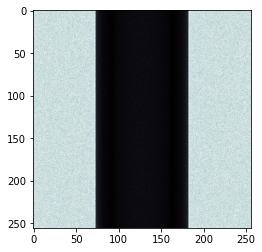

In [6]:
raws_tubo1 = np.rot90(np.genfromtxt("datos/RAWS_tubo2.txt"),1)
im = plt.imshow(raws_tubo1, cmap="bone")
plt.savefig('sim_tubo1.png')

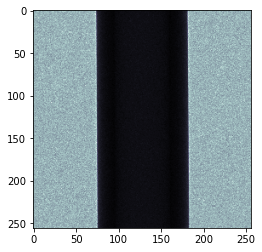

In [7]:
# Falta implementar flat field y la otra correccion de pixeles muertos
name1 = "./datos/2022-09-02 - Muestra de Sangre Artificial/1. RAW_tubo2_sangre/RAW.txt"
name2 = "./datos/2022-09-02 - Muestra de Sangre Artificial/2. FF/FF"
M=3
RAW_sangre=RawsC(name1, name2, 59, M)
im = plt.imshow(RAW_sangre, cmap="bone")
plt.savefig('sa_tubo1.png')

In [8]:
IF_itk_x4 = sitk.GetImageFromArray(raws_tubo1, sitk.sitkInt16)
HE_itk_x4 = sitk.GetImageFromArray(RAW_sangre, sitk.sitkInt8)

In [9]:
elastixImageFilter.SetFixedImage(sitk.ReadImage("sim_tubo1.png", sitk.sitkInt16))
#elastixImageFilter.SetFixedImage(IF_itk_x4)

<SimpleITK.SimpleITK.ElastixImageFilter; proxy of <Swig Object of type 'itk::simple::ElastixImageFilter::Self *' at 0x7fef3c0e5e70> >

In [10]:
elastixImageFilter.SetMovingImage(sitk.ReadImage("sa_tubo1.png", sitk.sitkInt8))
#elastixImageFilter.SetMovingImage(HE_itk_x4)

<SimpleITK.SimpleITK.ElastixImageFilter; proxy of <Swig Object of type 'itk::simple::ElastixImageFilter::Self *' at 0x7fef39a42540> >

In [11]:
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap("affine"))

<SimpleITK.SimpleITK.ElastixImageFilter; proxy of <Swig Object of type 'itk::simple::ElastixImageFilter::Self *' at 0x7fef37d44390> >

In [12]:
elastixImageFilter.Execute()

Installing all components.
InstallingComponents was successful.

ELASTIX version: 5.000
Command line options from ElastixBase:
-fMask    unspecified, so no fixed mask used
-mMask    unspecified, so no moving mask used
-out      ./
-threads  unspecified, so all available threads are used
  The default value "true" is used instead.

  From elastix 4.8 it defaults to true!
This may change the behavior of your registrations considerably.

Command line options from TransformBase:
-t0       unspecified, so no initial transform used

Reading images...
Reading images took 0 ms.

  A default pyramid schedule is used.
  A default pyramid schedule is used.
  The default value "false" is used instead.
  The default value "GeometricalCenter" is used instead.
Transform parameters are initialized as: [1, 0, 0, 1, 0, 0]
InitializeTransform took 0.00s
Scales are estimated automatically.
Scales for transform parameters are: [15550.916666666666, 6910.916666666667, 15550.916666666666, 6910.916666666667, 1

157	-1.157806	23.504878	1.691080	0.016517	1.4
158	-1.147024	23.558170	1.689058	0.013221	1.3
159	-1.128520	23.234300	1.701424	0.015268	1.4
160	-1.126969	23.470134	1.692401	0.014947	1.4
161	-1.217611	23.893339	1.676447	0.018951	1.3
162	-1.178580	23.745015	1.682005	0.022152	1.5
163	-1.193666	24.055510	1.670413	0.007033	1.4
164	-1.171384	24.619585	1.649759	0.011582	1.1
165	-1.201209	24.790707	1.643594	0.011511	1.0
166	-1.157596	24.949692	1.637907	0.016528	1.0
167	-1.129966	24.638792	1.649065	0.009664	1.1
168	-1.162049	24.908801	1.639366	0.009717	1.0
169	-1.182742	24.745381	1.645222	0.015120	1.0
170	-1.196647	25.112768	1.632115	0.015877	1.0
171	-1.146743	24.793584	1.643491	0.016675	1.0
172	-1.189346	24.886899	1.640148	0.022157	1.0
173	-1.190931	25.133268	1.631389	0.018370	1.0
174	-1.159907	26.054112	1.599463	0.012056	1.0
175	-1.166954	25.982509	1.601901	0.011656	1.0
176	-1.171032	26.119914	1.597230	0.037413	1.0
177	-1.171963	25.472538	1.619479	0.020100	1.0
178	-1.188329	26.469226	1.585476	0

62	-1.014953	11.088980	1.761341	0.013683	1.5
63	-1.101303	11.117669	1.759767	0.029215	1.4
64	-1.060300	11.730588	1.726814	0.026707	1.4
65	-1.014789	12.541080	1.685087	0.023286	1.4
66	-1.051353	13.427623	1.641694	0.017641	1.2
67	-1.061092	13.373205	1.644293	0.013642	1.3
68	-1.011672	13.564839	1.635177	0.028516	1.1
69	-1.022304	13.184056	1.653391	0.020261	1.0
70	-1.041962	13.714500	1.628127	0.016617	1.0
71	-1.028597	13.863906	1.621150	0.021699	1.0
72	-1.022740	14.348983	1.598904	0.019489	1.0
73	-1.065640	14.037908	1.613099	0.017119	1.0
74	-1.039611	13.701005	1.628760	0.013605	0.9
75	-1.060835	14.090043	1.610703	0.015901	1.0
76	-1.030769	14.339025	1.599354	0.007233	0.9
77	-1.013172	14.290054	1.601574	0.023820	1.0
78	-1.011967	14.308489	1.600738	0.023133	1.0
79	-1.036708	14.531413	1.590694	0.021498	1.1
80	-1.034193	14.796284	1.578924	0.015590	1.0
81	-1.034375	15.018023	1.569204	0.021191	1.1
82	-1.068195	14.695688	1.583374	0.040045	1.5
83	-1.037310	15.623777	1.543249	0.033169	1.1
84	-1.0209

245	-1.047041	39.570781	0.933117	0.021203	1.5
246	-1.035651	39.758482	0.930234	0.016433	1.8
247	-1.056044	40.303922	0.921958	0.023076	1.3
248	-1.071224	40.791213	0.914687	0.018365	1.9
249	-1.062948	40.553130	0.918225	0.028106	1.7
250	-1.041813	41.019250	0.911324	0.018826	1.8
251	-1.070790	41.391373	0.905888	0.042177	1.4
252	-1.055718	40.869303	0.913533	0.008330	1.4
253	-0.987142	41.049696	0.910877	0.030908	1.3
254	-1.067443	40.983041	0.911856	0.014577	1.5
255	-1.075233	41.738807	0.900872	0.024310	1.2
Time spent in resolution 1 (ITK initialization and iterating): 0.299 s.
Stopping condition: Maximum number of iterations has been reached.
Settings of AdaptiveStochasticGradientDescent in resolution 1:
( SP_a 56.519622 )
( SP_A 20.000000 )
( SP_alpha 1.000000 )
( SigmoidMax 1.000000 )
( SigmoidMin -0.547563 )
( SigmoidScale 0.000180 )


Resolution: 2
  The default value "false" is used instead.
  The default value "true" is used instead.
Setting the fixed masks took: 0 ms.
Setting the movi

156	-0.944512	15.296830	1.398177	0.022399	1.2
157	-0.940213	15.117315	1.405126	0.039477	1.2
158	-0.959305	14.958009	1.411351	0.022485	1.2
159	-0.930960	14.699850	1.421557	0.044364	0.9
160	-0.950992	15.578797	1.387399	0.034559	1.1
161	-0.951356	16.532049	1.352161	0.044979	1.0
162	-0.915166	16.594562	1.349913	0.042402	1.0
163	-0.895210	17.593964	1.314956	0.038715	1.0
164	-0.920571	18.576568	1.282309	0.039507	1.0
165	-0.929023	17.933984	1.303473	0.023123	1.0
166	-0.928857	18.638928	1.280291	0.026594	0.9
167	-0.945773	18.987441	1.269133	0.027080	0.9
168	-0.942258	18.392941	1.288286	0.014402	1.0
169	-0.933525	18.694934	1.278485	0.033227	1.0
170	-0.933218	18.174779	1.295461	0.018585	0.9
171	-0.964641	17.684008	1.311896	0.037711	1.0
172	-0.972515	17.122067	1.331234	0.053498	1.0
173	-0.970689	18.120544	1.297256	0.039303	1.0
174	-0.961025	17.466663	1.319308	0.033775	1.0
175	-0.956360	17.891901	1.304883	0.014336	1.0
176	-0.945438	18.390459	1.288367	0.022951	1.0
177	-0.938360	18.473029	1.285672	0

78	-0.831640	11.843524	0.947517	0.037987	1.0
79	-0.845563	12.572286	0.926949	0.065050	1.0
80	-0.870487	12.226112	0.936607	0.095584	1.0
81	-0.850581	11.651070	0.953102	0.032750	1.1
82	-0.864713	11.090999	0.969736	0.063793	1.0
83	-0.846326	11.512252	0.957171	0.068215	0.9
84	-0.834127	10.893805	0.975732	0.044774	1.0
85	-0.860366	10.284066	0.994749	0.042202	1.0
86	-0.842085	10.934130	0.974500	0.055238	1.0
87	-0.844611	11.156760	0.967753	0.040677	0.9
88	-0.850165	11.043721	0.971167	0.036445	0.9
89	-0.861599	11.233734	0.965442	0.075039	1.0
90	-0.844402	10.713254	0.981287	0.062522	1.0
91	-0.855272	11.704655	0.951540	0.080851	0.9
92	-0.850480	12.701991	0.923382	0.020553	1.0
93	-0.850179	13.390788	0.904888	0.061004	1.0
94	-0.850906	13.752443	0.895471	0.025998	1.0
95	-0.860391	14.224284	0.883476	0.022923	1.0
96	-0.836470	14.544261	0.875523	0.078558	1.0
97	-0.845511	15.142567	0.861029	0.046479	1.0
98	-0.842514	15.203887	0.859571	0.022870	1.0
99	-0.844646	15.219134	0.859209	0.047802	1.0
100	-0.861


Final metric value  = -0.862412
Settings of AdaptiveStochasticGradientDescent for all resolutions:
( SP_a 75.261320 56.519622 50.749379 31.119800 )
( SP_A 20.000000 20.000000 20.000000 20.000000 )
( SP_alpha 1.000000 1.000000 1.000000 1.000000 )
( SigmoidMax 1.000000 1.000000 1.000000 1.000000 )
( SigmoidMin -0.679123 -0.547563 -0.654211 -0.626350 )
( SigmoidScale 0.000089 0.000180 0.000203 0.000561 )



<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7fef3ac87930> >

In [13]:
sitk.WriteImage(elastixImageFilter.GetResultImage(), 'result.tif')

In [14]:
 from PIL import Image
im = Image.open('result.tif')
im.show()